<a href="https://colab.research.google.com/github/GVSU-CIS635/term-project-pjlj-team/blob/main/PJL_Group_Project_Code_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Precision-Driven Breast Cancer Diagnosis: Feature Engineering Meets Machine Learning**

This project aims to predict whether a breast cancer patient will survive or not, based on structured clinical features. We are not predicting tumor type (benign vs malignant) or survival duration.

Target Variable: Status

Alive → Patient survived

Dead → Patient did not survive

By building predictive models, we aim to assist in early identification of high-risk patients and support medical decision-making.




📌 T Stage: Size/extent of tumor (T1 = small, T4 = large/invasive)

📌 N Stage: Lymph node involvement (N0 = none, N3 = extensive)

📌 A Stage: Overall cancer stage (AJCC) combining T, N, M

📌 6th Stage: Staging based on older AJCC 6th edition system

📌 Grade: How abnormal/aggressive the tumor cells are (Grade 1 = mild, Grade 3 = severe)

📌 Marital status, Race

📌 Differentiate: Describes how much tumor cells resemble normal cells.
 - Well-differentiated = slow-growing, look more normal.
 - Poorly-differentiated = aggressive, look abnormal.

📌 Estrogen Status: Indicates if tumor cells have estrogen receptors (ER).
 - Positive = tumor growth may be fueled by estrogen

📌 Progesterone Status: Indicates if tumor cells have progesterone receptors (PR).
 - Positive = tumor may respond well to hormone-blocking treatment.





In [ ]:
!pip install xgboost imbalanced-learn


In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/Breast_Cancer (1).csv')


The dataset includes a variety of clinical and pathological features such as:

Tumor Size,
Survival Months,
Age,
Regional Node Involvement,
Estrogen & Progesterone Receptor Status,
Tumor Grade and Stage.
These features are selected due to their relevance in cancer prognosis and survival prediction.

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df.shape

(4024, 16)

In [ ]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


In [ ]:
df.select_dtypes(include=['int64'])

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.head()
# df.info()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})  # Encode binary target

In [ ]:
df.select_dtypes(include=['int64'])

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,4,24,1,60,0
1,50,35,14,5,62,0
2,58,63,14,7,75,0
3,58,18,2,1,84,0
4,47,41,3,1,50,0
...,...,...,...,...,...,...
4019,62,9,1,1,49,0
4020,56,46,14,8,69,0
4021,68,22,11,3,69,0
4022,58,44,11,1,72,0


In [ ]:
print(df.head())
df.info()

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [ ]:
# Removing duplicates
# Rationale: Duplicate records can bias model training.
print(df.drop_duplicates(inplace=True))

None


In [ ]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


# **Data Visualization**
In this section, we visually explore our breast cancer dataset to better understand feature distributions, identify outliers, and analyze relationships between key variables.

# Plot 1: Class Distribution

We start by visualizing the target variable Status to check for class imbalance between patients who survived (Status = 0) and those who did not (Status = 1).

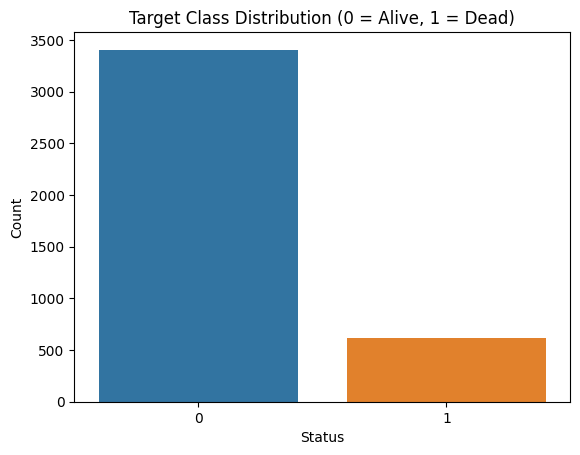

In [ ]:
#EDA Visualization 1: Target Class Distribution
sns.countplot(x='Status', data=df, hue='Status', legend=False)
plt.title('Target Class Distribution (0 = Alive, 1 = Dead)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Plot 2: Outcome by Cancer Stage

We further examine how cancer staging features (T Stage, N Stage) relate to patient outcomes. For each stage type, we visualize the distribution of alive vs deceased patients.

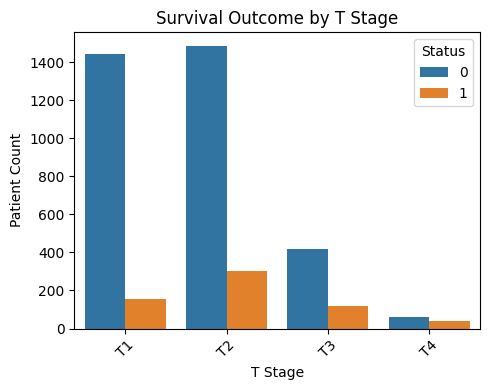

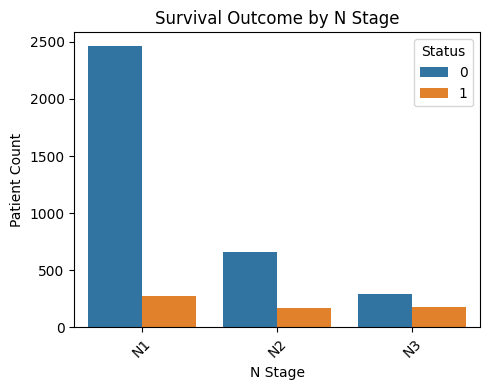

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


stage_columns = ['T Stage ', 'N Stage']
for col in stage_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, hue='Status')
    plt.title(f'Survival Outcome by {col.strip()}')
    plt.xlabel(col.strip())
    plt.ylabel('Patient Count')
    plt.xticks(rotation=45)
    plt.legend(title="Status")
    plt.tight_layout()
    plt.show()
    #These insights reveal that patients with more advanced stages tend to have higher mortality rates.
    #We are not going to  visualize any categorical value in upcoming visualizations as the stages of breast cancer[T,N,6th,A,Grade] and hormone status[Estrogen, Progesterone]
    #are highly realted to breast cancer.(You can observe the relation between advanced stages and mortality rate here)



# **Plot 3: Histograms**

Histograms help us observe the distribution of each numeric feature and identify any skewness or irregularities.

['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


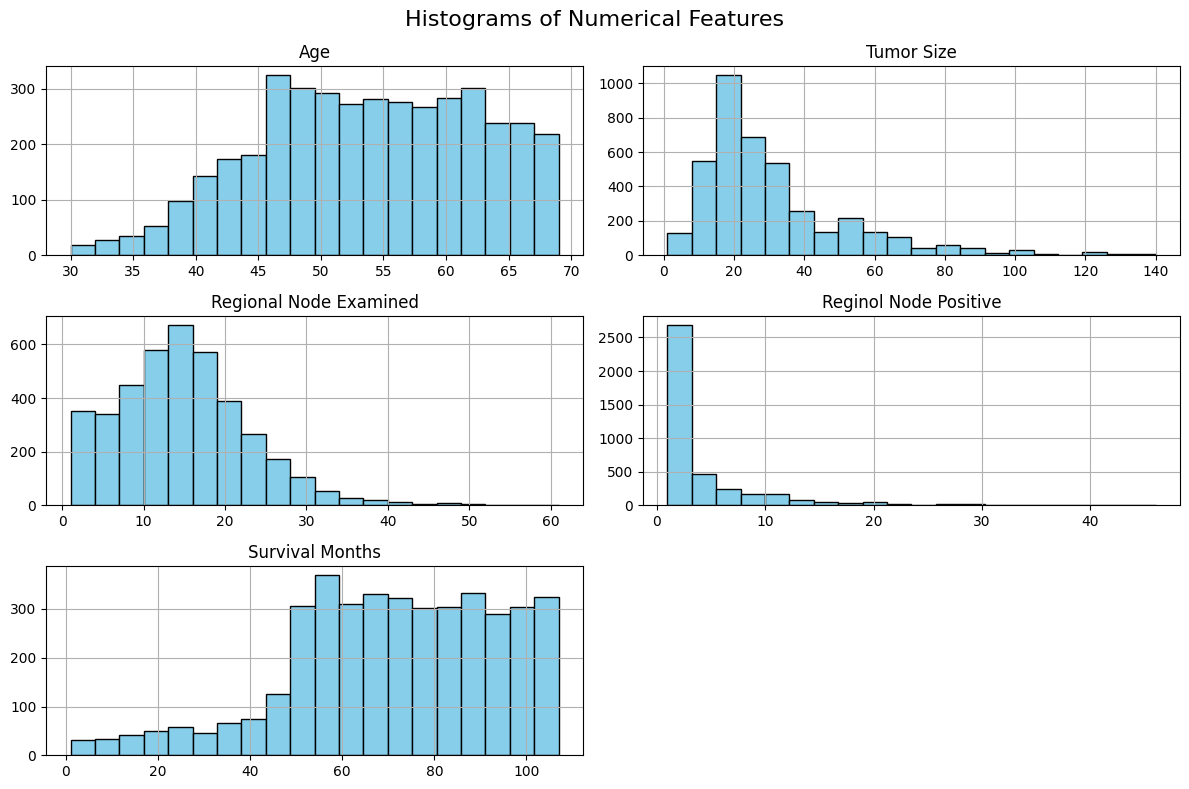

In [ ]:

# Defining numerical columns excluding the target
# x=df.drop('Status',axis=1)
# y=df['Status']
numerical_cols = df.select_dtypes(include='int64').columns.drop('Status')
print(numerical_cols.tolist())

# EDA Visualization: Histograms for all numerical features
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()
# Most features like Tumor Size, Reginol Node Positive, and Regional Node Examined show strong right-skew, indicating concentration in lower values with long tails.
#These features are informative but would benefit from quantile transformation to improve model performance.



# Plot 4: Boxplots

Boxplots allow us to detect outliers and understand the spread of values.




 Boxplots: Checking if numerical features differ across Alive/Dead groups:


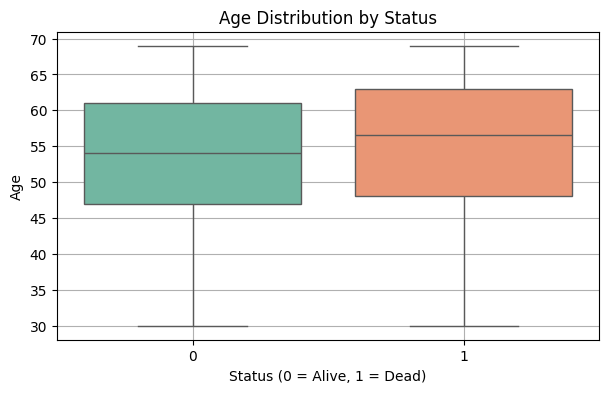

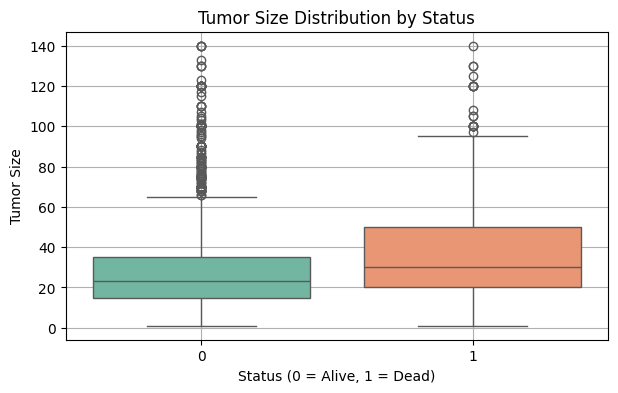

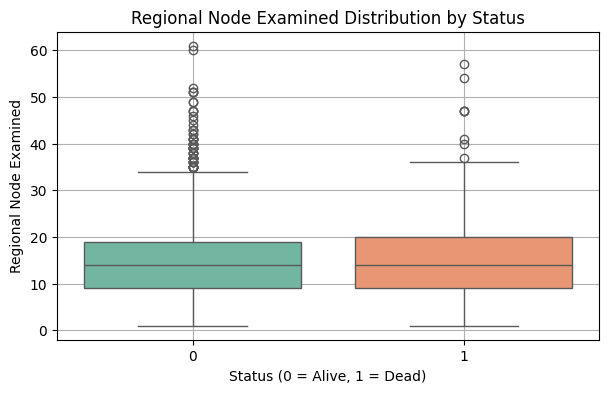

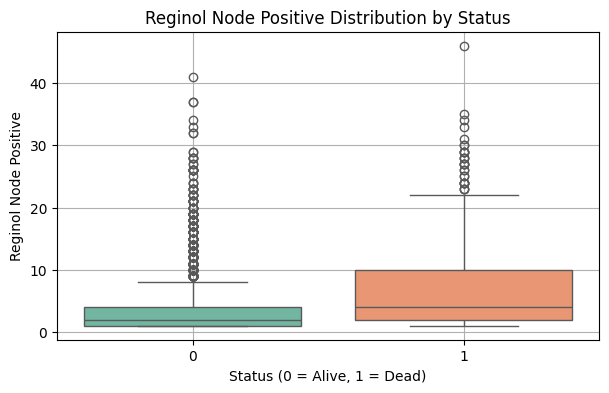

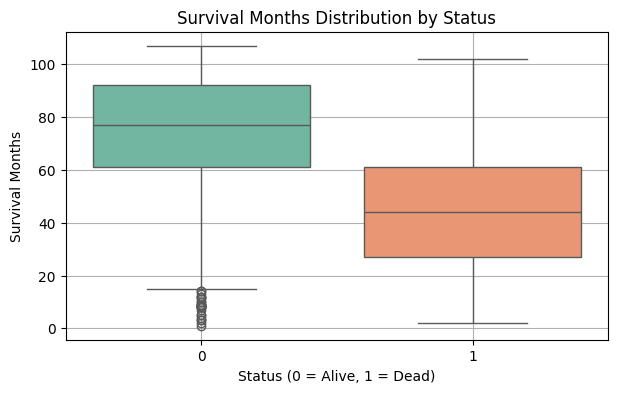

In [ ]:

# EDA 4: Boxplots of numerical features by target class (Status)
# Explanation: Helps determine if a feature separates Alive (0) vs Dead (1)
print(" Boxplots: Checking if numerical features differ across Alive/Dead groups:")
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Status', y=col, data=df, hue='Status', palette='Set2', legend=False)
    plt.title(f'{col} Distribution by Status')
    plt.xlabel('Status (0 = Alive, 1 = Dead)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()
    #we are dropping Age and Regional Node Examined as they show very less difference between "alive" and "dead" groups.

# Feature Selection
Using a correlation matrix, we identify highly correlated  features. We drop less important features to reduce dimensionality and improve model performance.

   Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0   68           4                      24                      1   
1   50          35                      14                      5   
2   58          63                      14                      7   
3   58          18                       2                      1   
4   47          41                       3                      1   

   Survival Months  Status  
0               60       0  
1               62       0  
2               75       0  
3               84       0  
4               50       0  
0       24
1       14
2       14
3        2
4        3
        ..
4019     1
4020    14
4021    11
4022    11
4023     7
Name: Regional Node Examined, Length: 4023, dtype: int64


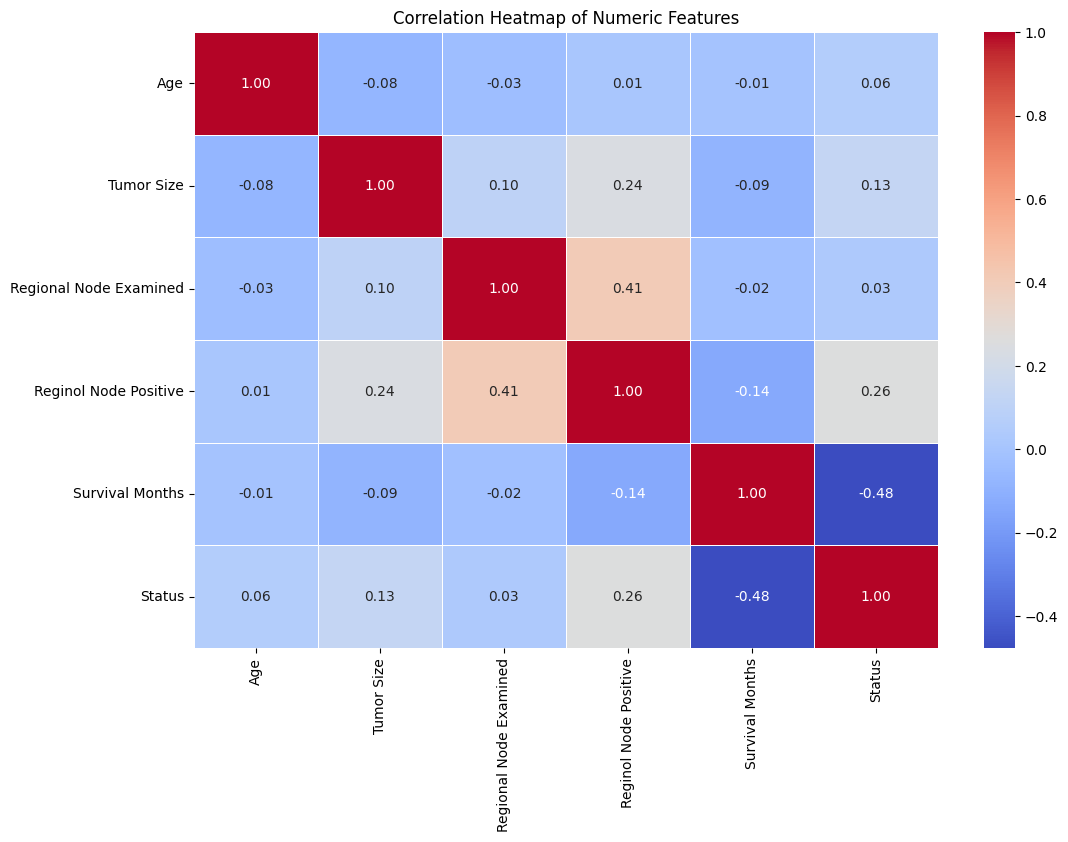

In [ ]:
# numeric columns
numeric_df = df.select_dtypes(include=['int64'])
print(numeric_df.head())
print(numeric_df['Regional Node Examined'])


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Dropping Columns

In [ ]:
#We are dropping Age(0.06) and Regional Node Examined(0.03) as they have least correlation with the target Status, and they are less important.

dropped_cols = numeric_df.drop(columns=['Age','Regional Node Examined'])
print(dropped_cols)





      Tumor Size  Reginol Node Positive  Survival Months  Status
0              4                      1               60       0
1             35                      5               62       0
2             63                      7               75       0
3             18                      1               84       0
4             41                      1               50       0
...          ...                    ...              ...     ...
4019           9                      1               49       0
4020          46                      8               69       0
4021          22                      3               69       0
4022          44                      1               72       0
4023          30                      2              100       0

[4023 rows x 4 columns]


# Handling Outliers
To manage outliers and ensure all features are on a comparable scale, we apply the Quantile
Transformer, which transforms features to follow a uniform or normal distribution.

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Step 1: Keeping only numeric columns
x = dropped_cols.select_dtypes(include=['int64', 'float64'])

# Step 2: Applying Quantile Transformation
quantile = QuantileTransformer(output_distribution='uniform', random_state=42)
X = quantile.fit_transform(x)

# Step 3: Creating DataFrame with transformed values
df_new = pd.DataFrame(X, columns=x.columns)

# Step 4: Previewing transformed dataset
df_new.head()


,Tumor Size,Reginol Node Positive,Survival Months,Status
0,0.008509,0.000000,0.306306,0.0
1,0.714214,0.756757,0.335836,0.0
2,0.917918,0.830831,0.530030,0.0
3,0.311311,0.000000,0.669169,0.0
4,0.791792,0.000000,0.154655,0.0


In [ ]:
# Encode Categorical Features
# Explanation: ML models work with numbers, so we encode all categorical variables.
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols.tolist)
le = LabelEncoder()
for col in categorical_cols:
    # print(col)
    df[col] = le.fit_transform(df[col])


<bound method IndexOpsMixin.tolist of Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status'],
      dtype='object')>


In [ ]:
#  Feature-Target Split
X = df.drop('Status', axis=1)
y = df['Status']
feature_names = X.columns


# Train-Test Split
The dataset is split into training (80%) and testing (20%) sets using stratified sampling to maintain class balance. This ensures fair evaluation of models.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Applied SMOTE for Class Imbalance
SMOTE (Synthetic Minority Over-sampling Technique) was applied (Training Set ONLY) to balance the class distribution of the target variable. It generated synthetic samples for the minority class (Dead) to improve model training and prevent bias toward the majority class.

In [ ]:
# Handling Imbalance with SMOTE (Training Set ONLY)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Model Training
This section involves training and tuning six different machine learning models:

Logistic Regression,
K-Nearest Neighbors (KNN),
Decision Tree Classifier (DTC),
Random Forest (RF),
Support Vector Machine (SVM),
Naive Bayes (NB)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "settings": {
            "penalty": "l2",
            "solver": "lbfgs"
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(weights='distance'),
        "settings": {
            "n_neighbors": 5,
            "weights": "distance",
            "metric": "minkowski"
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "settings": {
            "priors": None,
            "var_smoothing": 1e-9
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "settings": {
            "kernel": "rbf",
            "C": 1.0,
            "gamma": "scale"
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(max_depth=3),
        "settings": {
            "criterion": "gini",
            "max_depth": 3,
            "min_samples_split": 2
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "settings": {
            "n_estimators": 100,
            "criterion": "gini",
            "max_features": "sqrt"
        }
    }
}


# Logistic Regression


📊 Manual Logistic Regression – Model Evaluation
- Recall (for dead): 0.667
- Precision (for dead): 0.439
- F1-Score (for dead): 0.529
- PR-AUC: 0.592
- ROC-AUC: 0.840

📊 Grid Search Logistic Regression – Model Evaluation
- Recall (for dead): 0.667
- Precision (for dead): 0.446
- F1-Score (for dead): 0.534
- PR-AUC: 0.598
- ROC-AUC: 0.842

🛠️ Best Parameters from Grid Search:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


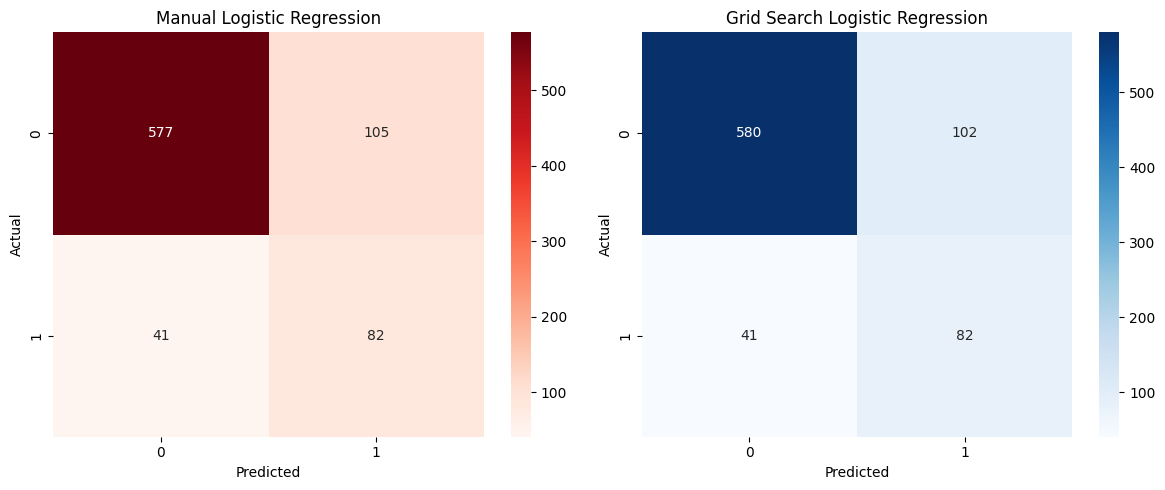

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

#  MANUAL MODEL (Default hyperparameters)
manual_model_lr = LogisticRegression(max_iter=1000)
manual_model_lr.fit(X_train_sm, y_train_sm)

y_pred_lr_manual = manual_model_lr.predict(X_test)
y_proba_lr_manual = manual_model_lr.predict_proba(X_test)[:, 1]

#  GRID SEARCH MODEL
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_sm, y_train_sm)

best_model_lr = grid_lr.best_estimator_
y_pred_lr_grid = best_model_lr.predict(X_test)
y_proba_lr_grid = best_model_lr.predict_proba(X_test)[:, 1]

# MANUAL EVALUATION
report_lr_manual = classification_report(y_test, y_pred_lr_manual, output_dict=True)
recall_lr_manual = report_lr_manual['1']['recall']
precision_lr_manual = report_lr_manual['1']['precision']
f1_lr_manual = report_lr_manual['1']['f1-score']
roc_auc_lr_manual = roc_auc_score(y_test, y_proba_lr_manual)
precision_vals_lr_manual, recall_vals_lr_manual, _ = precision_recall_curve(y_test, y_proba_lr_manual)
pr_auc_lr_manual = auc(recall_vals_lr_manual, precision_vals_lr_manual)

# GRID SEARCH EVALUATION
report_lr_grid = classification_report(y_test, y_pred_lr_grid, output_dict=True)
recall_lr_grid = report_lr_grid['1']['recall']
precision_lr_grid = report_lr_grid['1']['precision']
f1_lr_grid = report_lr_grid['1']['f1-score']
roc_auc_lr_grid = roc_auc_score(y_test, y_proba_lr_grid)
precision_vals_lr_grid, recall_vals_lr_grid, _ = precision_recall_curve(y_test, y_proba_lr_grid)
pr_auc_lr_grid = auc(recall_vals_lr_grid, precision_vals_lr_grid)

#  Printing evaluation results
print("\n Manual Logistic Regression – Model Evaluation")
print(f"- Recall (for dead): {recall_lr_manual:.3f}")
print(f"- Precision (for dead): {precision_lr_manual:.3f}")
print(f"- F1-Score (for dead): {f1_lr_manual:.3f}")
print(f"- PR-AUC: {pr_auc_lr_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_lr_manual:.3f}")

print("\n Grid Search Logistic Regression – Model Evaluation")
print(f"- Recall (for dead): {recall_lr_grid:.3f}")
print(f"- Precision (for dead): {precision_lr_grid:.3f}")
print(f"- F1-Score (for dead): {f1_lr_grid:.3f}")
print(f"- PR-AUC: {pr_auc_lr_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_lr_grid:.3f}")

#  Best Parameters
print("\n Best Parameters from Grid Search:")
print(grid_lr.best_params_)

#  Confusion Matrix Comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual Logistic Regression')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_lr_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search Logistic Regression')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Naive Bayes


📊 Manual Naive Bayes – Model Evaluation
- Recall (for dead): 0.553
- Precision (for dead): 0.400
- F1-Score (for dead): 0.464
- PR-AUC: 0.397
- ROC-AUC: 0.778

📊 Grid Search Naive Bayes – Model Evaluation
- Recall (for dead): 0.561
- Precision (for dead): 0.404
- F1-Score (for dead): 0.469
- PR-AUC: 0.397
- ROC-AUC: 0.778

🛠️ Best Parameters from Grid Search:
{'var_smoothing': 1e-06}


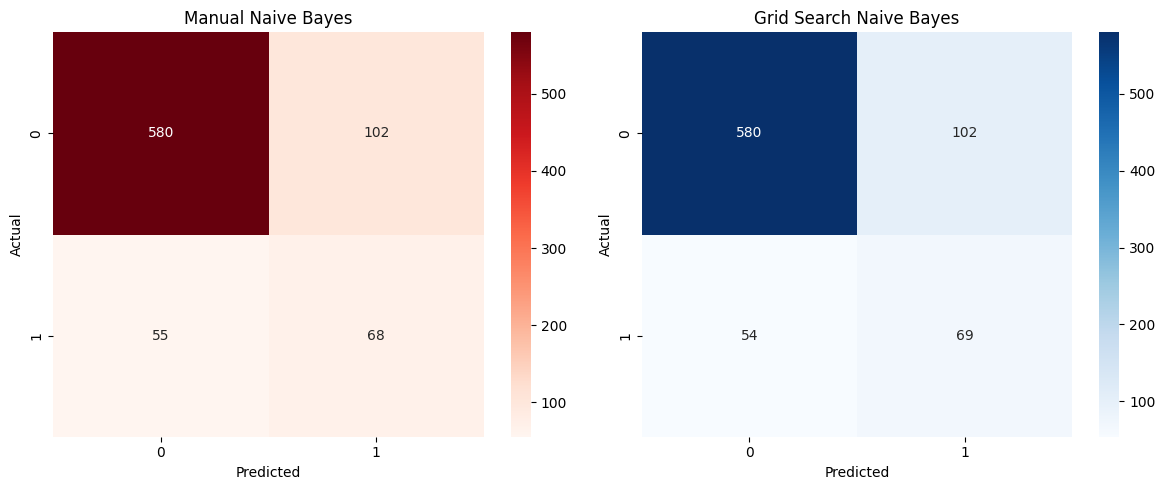

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 MANUAL Naive Bayes (Default)
manual_model_nb = GaussianNB()
manual_model_nb.fit(X_train_sm, y_train_sm)

y_pred_nb_manual = manual_model_nb.predict(X_test)
y_proba_nb_manual = manual_model_nb.predict_proba(X_test)[:, 1]

# 🔹 GRID SEARCH Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='f1', n_jobs=-1)
grid_nb.fit(X_train_sm, y_train_sm)

best_model_nb = grid_nb.best_estimator_
y_pred_nb_grid = best_model_nb.predict(X_test)
y_proba_nb_grid = best_model_nb.predict_proba(X_test)[:, 1]

# 🔍 MANUAL EVALUATION
report_nb_manual = classification_report(y_test, y_pred_nb_manual, output_dict=True)
recall_nb_manual = report_nb_manual['1']['recall']
precision_nb_manual = report_nb_manual['1']['precision']
f1_nb_manual = report_nb_manual['1']['f1-score']
roc_auc_nb_manual = roc_auc_score(y_test, y_proba_nb_manual)
precision_vals_nb_manual, recall_vals_nb_manual, _ = precision_recall_curve(y_test, y_proba_nb_manual)
pr_auc_nb_manual = auc(recall_vals_nb_manual, precision_vals_nb_manual)

# 🔍 GRID SEARCH EVALUATION
report_nb_grid = classification_report(y_test, y_pred_nb_grid, output_dict=True)
recall_nb_grid = report_nb_grid['1']['recall']
precision_nb_grid = report_nb_grid['1']['precision']
f1_nb_grid = report_nb_grid['1']['f1-score']
roc_auc_nb_grid = roc_auc_score(y_test, y_proba_nb_grid)
precision_vals_nb_grid, recall_vals_nb_grid, _ = precision_recall_curve(y_test, y_proba_nb_grid)
pr_auc_nb_grid = auc(recall_vals_nb_grid, precision_vals_nb_grid)

# 📊 Printing evaluation results
print("\n📊 Manual Naive Bayes – Model Evaluation")
print(f"- Recall (for dead): {recall_nb_manual:.3f}")
print(f"- Precision (for dead): {precision_nb_manual:.3f}")
print(f"- F1-Score (for dead): {f1_nb_manual:.3f}")
print(f"- PR-AUC: {pr_auc_nb_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_nb_manual:.3f}")

print("\n📊 Grid Search Naive Bayes – Model Evaluation")
print(f"- Recall (for dead): {recall_nb_grid:.3f}")
print(f"- Precision (for dead): {precision_nb_grid:.3f}")
print(f"- F1-Score (for dead): {f1_nb_grid:.3f}")
print(f"- PR-AUC: {pr_auc_nb_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_nb_grid:.3f}")

# 🛠️ Best Parameters
print("\n🛠️ Best Parameters from Grid Search:")
print(grid_nb.best_params_)

# 🔲 Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual Naive Bayes')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_nb_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search Naive Bayes')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# SVM


📊 Manual SVM – Model Evaluation
- Recall (for dead): 0.683
- Precision (for dead): 0.494
- F1-Score (for dead): 0.573
- PR-AUC: 0.645
- ROC-AUC: 0.852

📊 Grid Search SVM – Model Evaluation
- Recall (for dead): 0.065
- Precision (for dead): 0.258
- F1-Score (for dead): 0.104
- PR-AUC: 0.296
- ROC-AUC: 0.724

🛠️ Best Parameters from Grid Search:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


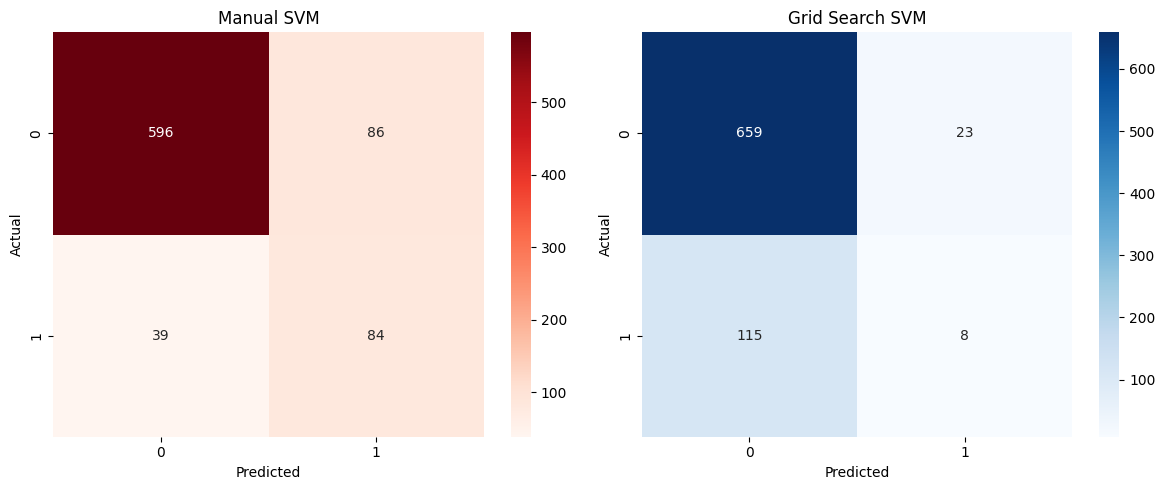

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 MANUAL SVM
manual_model_svm = SVC(probability=True)
manual_model_svm.fit(X_train_sm, y_train_sm)

y_pred_svm_manual = manual_model_svm.predict(X_test)
y_proba_svm_manual = manual_model_svm.predict_proba(X_test)[:, 1]

# 🔹 GRID SEARCH SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train_sm, y_train_sm)

best_model_svm = grid_svm.best_estimator_
y_pred_svm_grid = best_model_svm.predict(X_test)
y_proba_svm_grid = best_model_svm.predict_proba(X_test)[:, 1]

# 🔍 MANUAL EVALUATION
report_svm_manual = classification_report(y_test, y_pred_svm_manual, output_dict=True)
recall_svm_manual = report_svm_manual['1']['recall']
precision_svm_manual = report_svm_manual['1']['precision']
f1_svm_manual = report_svm_manual['1']['f1-score']
roc_auc_svm_manual = roc_auc_score(y_test, y_proba_svm_manual)
precision_vals_svm_manual, recall_vals_svm_manual, _ = precision_recall_curve(y_test, y_proba_svm_manual)
pr_auc_svm_manual = auc(recall_vals_svm_manual, precision_vals_svm_manual)

# 🔍 GRID SEARCH EVALUATION
report_svm_grid = classification_report(y_test, y_pred_svm_grid, output_dict=True)
recall_svm_grid = report_svm_grid['1']['recall']
precision_svm_grid = report_svm_grid['1']['precision']
f1_svm_grid = report_svm_grid['1']['f1-score']
roc_auc_svm_grid = roc_auc_score(y_test, y_proba_svm_grid)
precision_vals_svm_grid, recall_vals_svm_grid, _ = precision_recall_curve(y_test, y_proba_svm_grid)
pr_auc_svm_grid = auc(recall_vals_svm_grid, precision_vals_svm_grid)

# 📊 Printing evaluation results
print("\n📊 Manual SVM – Model Evaluation")
print(f"- Recall (for dead): {recall_svm_manual:.3f}")
print(f"- Precision (for dead): {precision_svm_manual:.3f}")
print(f"- F1-Score (for dead): {f1_svm_manual:.3f}")
print(f"- PR-AUC: {pr_auc_svm_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_svm_manual:.3f}")

print("\n📊 Grid Search SVM – Model Evaluation")
print(f"- Recall (for dead): {recall_svm_grid:.3f}")
print(f"- Precision (for dead): {precision_svm_grid:.3f}")
print(f"- F1-Score (for dead): {f1_svm_grid:.3f}")
print(f"- PR-AUC: {pr_auc_svm_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_svm_grid:.3f}")

# 🛠️ Best Parameters
print("\n🛠️ Best Parameters from Grid Search:")
print(grid_svm.best_params_)

# 🔲 Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual SVM')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_svm_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search SVM')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Decision Tree


📊 Manual Decision Tree – Model Evaluation
- Recall (for dead): 0.561
- Precision (for dead): 0.390
- F1-Score (for dead): 0.460
- PR-AUC: 0.509
- ROC-AUC: 0.701

📊 Grid Search Decision Tree – Model Evaluation
- Recall (for dead): 0.537
- Precision (for dead): 0.420
- F1-Score (for dead): 0.471
- PR-AUC: 0.479
- ROC-AUC: 0.710

🛠️ Best Parameters from Grid Search:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


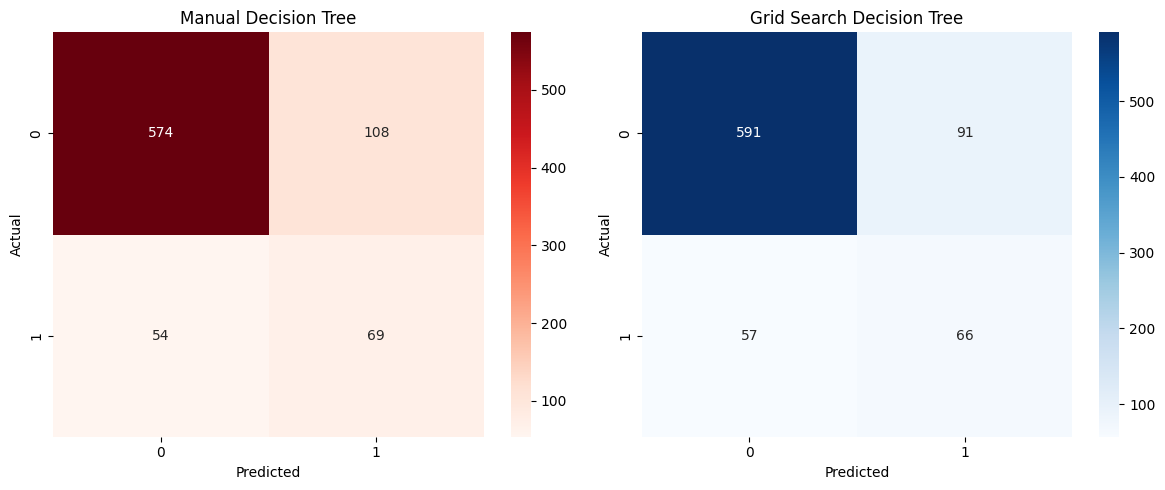

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 MANUAL DECISION TREE
manual_model_dt = DecisionTreeClassifier()
manual_model_dt.fit(X_train_sm, y_train_sm)

y_pred_dt_manual = manual_model_dt.predict(X_test)
y_proba_dt_manual = manual_model_dt.predict_proba(X_test)[:, 1]

# 🔹 GRID SEARCH DECISION TREE
param_grid_dt = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train_sm, y_train_sm)

best_model_dt = grid_dt.best_estimator_
y_pred_dt_grid = best_model_dt.predict(X_test)
y_proba_dt_grid = best_model_dt.predict_proba(X_test)[:, 1]

# 🔍 MANUAL EVALUATION
report_dt_manual = classification_report(y_test, y_pred_dt_manual, output_dict=True)
recall_dt_manual = report_dt_manual['1']['recall']
precision_dt_manual = report_dt_manual['1']['precision']
f1_dt_manual = report_dt_manual['1']['f1-score']
roc_auc_dt_manual = roc_auc_score(y_test, y_proba_dt_manual)
precision_vals_dt_manual, recall_vals_dt_manual, _ = precision_recall_curve(y_test, y_proba_dt_manual)
pr_auc_dt_manual = auc(recall_vals_dt_manual, precision_vals_dt_manual)

# 🔍 GRID SEARCH EVALUATION
report_dt_grid = classification_report(y_test, y_pred_dt_grid, output_dict=True)
recall_dt_grid = report_dt_grid['1']['recall']
precision_dt_grid = report_dt_grid['1']['precision']
f1_dt_grid = report_dt_grid['1']['f1-score']
roc_auc_dt_grid = roc_auc_score(y_test, y_proba_dt_grid)
precision_vals_dt_grid, recall_vals_dt_grid, _ = precision_recall_curve(y_test, y_proba_dt_grid)
pr_auc_dt_grid = auc(recall_vals_dt_grid, precision_vals_dt_grid)

# 📊 Printing evaluation results
print("\n📊 Manual Decision Tree – Model Evaluation")
print(f"- Recall (for dead): {recall_dt_manual:.3f}")
print(f"- Precision (for dead): {precision_dt_manual:.3f}")
print(f"- F1-Score (for dead): {f1_dt_manual:.3f}")
print(f"- PR-AUC: {pr_auc_dt_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_dt_manual:.3f}")

print("\n📊 Grid Search Decision Tree – Model Evaluation")
print(f"- Recall (for dead): {recall_dt_grid:.3f}")
print(f"- Precision (for dead): {precision_dt_grid:.3f}")
print(f"- F1-Score (for dead): {f1_dt_grid:.3f}")
print(f"- PR-AUC: {pr_auc_dt_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_dt_grid:.3f}")

# 🛠️ Best Parameters
print("\n🛠️ Best Parameters from Grid Search:")
print(grid_dt.best_params_)

# 📊 Confusion Matrix Comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual Decision Tree')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_dt_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search Decision Tree')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Random Forest


📊 Manual Random Forest – Model Evaluation
- Recall (for dead): 0.528
- Precision (for dead): 0.607
- F1-Score (for dead): 0.565
- PR-AUC: 0.596
- ROC-AUC: 0.841

📊 Grid Search Random Forest – Model Evaluation
- Recall (for dead): 0.569
- Precision (for dead): 0.619
- F1-Score (for dead): 0.593
- PR-AUC: 0.629
- ROC-AUC: 0.840

🛠️ Best Parameters from Grid Search:
{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}


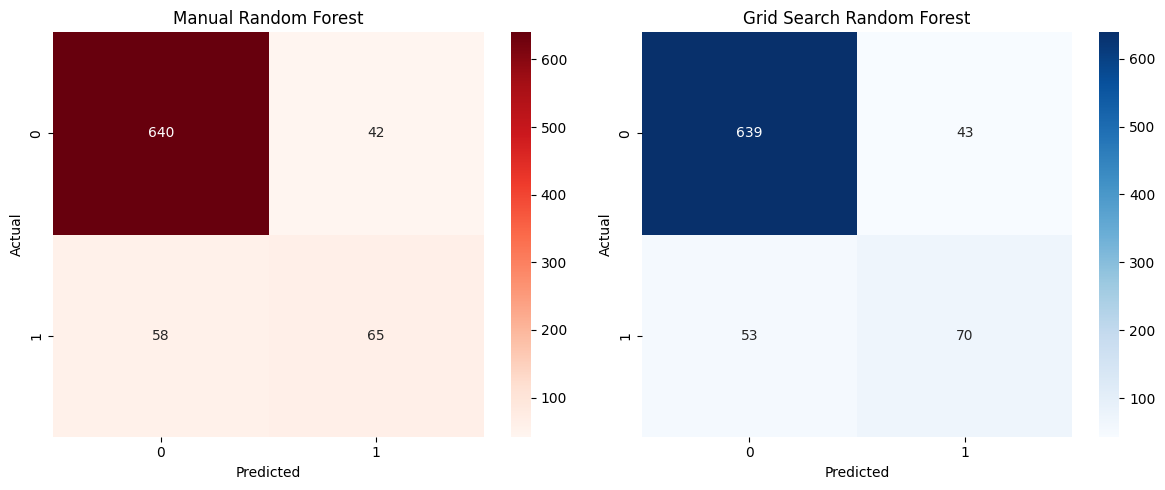

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 MANUAL RANDOM FOREST
manual_model_rf = RandomForestClassifier()
manual_model_rf.fit(X_train_sm, y_train_sm)

y_pred_rf_manual = manual_model_rf.predict(X_test)
y_proba_rf_manual = manual_model_rf.predict_proba(X_test)[:, 1]

# 🔹 GRID SEARCH RANDOM FOREST
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_sm, y_train_sm)

best_model_rf = grid_rf.best_estimator_
y_pred_rf_grid = best_model_rf.predict(X_test)
y_proba_rf_grid = best_model_rf.predict_proba(X_test)[:, 1]

# 🔍 MANUAL EVALUATION
report_rf_manual = classification_report(y_test, y_pred_rf_manual, output_dict=True)
recall_rf_manual = report_rf_manual['1']['recall']
precision_rf_manual = report_rf_manual['1']['precision']
f1_rf_manual = report_rf_manual['1']['f1-score']
roc_auc_rf_manual = roc_auc_score(y_test, y_proba_rf_manual)
precision_vals_rf_manual, recall_vals_rf_manual, _ = precision_recall_curve(y_test, y_proba_rf_manual)
pr_auc_rf_manual = auc(recall_vals_rf_manual, precision_vals_rf_manual)

# 🔍 GRID SEARCH EVALUATION
report_rf_grid = classification_report(y_test, y_pred_rf_grid, output_dict=True)
recall_rf_grid = report_rf_grid['1']['recall']
precision_rf_grid = report_rf_grid['1']['precision']
f1_rf_grid = report_rf_grid['1']['f1-score']
roc_auc_rf_grid = roc_auc_score(y_test, y_proba_rf_grid)
precision_vals_rf_grid, recall_vals_rf_grid, _ = precision_recall_curve(y_test, y_proba_rf_grid)
pr_auc_rf_grid = auc(recall_vals_rf_grid, precision_vals_rf_grid)

# 📊 Printing evaluation results
print("\n📊 Manual Random Forest – Model Evaluation")
print(f"- Recall (for dead): {recall_rf_manual:.3f}")
print(f"- Precision (for dead): {precision_rf_manual:.3f}")
print(f"- F1-Score (for dead): {f1_rf_manual:.3f}")
print(f"- PR-AUC: {pr_auc_rf_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_rf_manual:.3f}")

print("\n📊 Grid Search Random Forest – Model Evaluation")
print(f"- Recall (for dead): {recall_rf_grid:.3f}")
print(f"- Precision (for dead): {precision_rf_grid:.3f}")
print(f"- F1-Score (for dead): {f1_rf_grid:.3f}")
print(f"- PR-AUC: {pr_auc_rf_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_rf_grid:.3f}")

# 🛠️ Best Parameters from Grid Search
print("\n🛠️ Best Parameters from Grid Search:")
print(grid_rf.best_params_)

# 📊 Confusion Matrix Comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual Random Forest')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search Random Forest')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


KNN


📊 Manual KNN – Model Evaluation
- Recall (for dead): 0.642
- Precision (for dead): 0.391
- F1-Score (for dead): 0.486
- PR-AUC: 0.527
- ROC-AUC: 0.767

📊 Grid Search KNN – Model Evaluation
- Recall (for dead): 0.585
- Precision (for dead): 0.414
- F1-Score (for dead): 0.485
- PR-AUC: 0.516
- ROC-AUC: 0.757

🛠️ Best Parameters from Grid Search:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


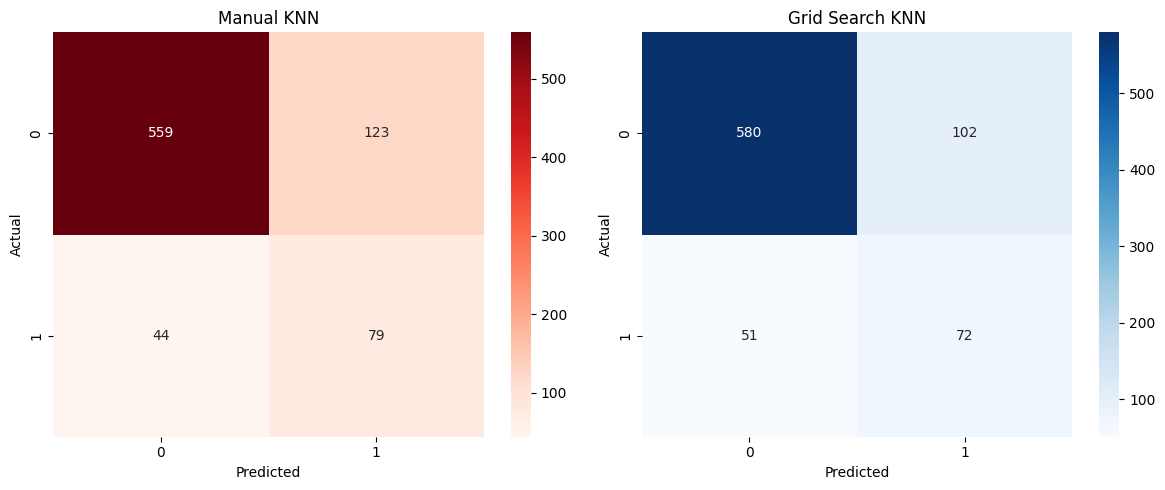

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 MANUAL KNN
manual_model_knn = KNeighborsClassifier(weights='distance')  # or use default
manual_model_knn.fit(X_train_sm, y_train_sm)

y_pred_knn_manual = manual_model_knn.predict(X_test)
y_proba_knn_manual = manual_model_knn.predict_proba(X_test)[:, 1]

# 🔹 GRID SEARCH KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_sm, y_train_sm)

best_model_knn = grid_knn.best_estimator_
y_pred_knn_grid = best_model_knn.predict(X_test)
y_proba_knn_grid = best_model_knn.predict_proba(X_test)[:, 1]

# 🔍 MANUAL EVALUATION
report_knn_manual = classification_report(y_test, y_pred_knn_manual, output_dict=True)
recall_knn_manual = report_knn_manual['1']['recall']
precision_knn_manual = report_knn_manual['1']['precision']
f1_knn_manual = report_knn_manual['1']['f1-score']
roc_auc_knn_manual = roc_auc_score(y_test, y_proba_knn_manual)
precision_vals_knn_manual, recall_vals_knn_manual, _ = precision_recall_curve(y_test, y_proba_knn_manual)
pr_auc_knn_manual = auc(recall_vals_knn_manual, precision_vals_knn_manual)

# 🔍 GRID SEARCH EVALUATION
report_knn_grid = classification_report(y_test, y_pred_knn_grid, output_dict=True)
recall_knn_grid = report_knn_grid['1']['recall']
precision_knn_grid = report_knn_grid['1']['precision']
f1_knn_grid = report_knn_grid['1']['f1-score']
roc_auc_knn_grid = roc_auc_score(y_test, y_proba_knn_grid)
precision_vals_knn_grid, recall_vals_knn_grid, _ = precision_recall_curve(y_test, y_proba_knn_grid)
pr_auc_knn_grid = auc(recall_vals_knn_grid, precision_vals_knn_grid)

# 📊 Printing evaluation results
print("\n📊 Manual KNN – Model Evaluation")
print(f"- Recall (for dead): {recall_knn_manual:.3f}")
print(f"- Precision (for dead): {precision_knn_manual:.3f}")
print(f"- F1-Score (for dead): {f1_knn_manual:.3f}")
print(f"- PR-AUC: {pr_auc_knn_manual:.3f}")
print(f"- ROC-AUC: {roc_auc_knn_manual:.3f}")

print("\n📊 Grid Search KNN – Model Evaluation")
print(f"- Recall (for dead): {recall_knn_grid:.3f}")
print(f"- Precision (for dead): {precision_knn_grid:.3f}")
print(f"- F1-Score (for dead): {f1_knn_grid:.3f}")
print(f"- PR-AUC: {pr_auc_knn_grid:.3f}")
print(f"- ROC-AUC: {roc_auc_knn_grid:.3f}")

# 🛠️ Best Parameters from Grid Search
print("\n🛠️ Best Parameters from Grid Search:")
print(grid_knn.best_params_)

# 📊 Confusion Matrix Comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_manual), annot=True, fmt='d', cmap='Reds', ax=axs[0])
axs[0].set_title('Manual KNN')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_knn_grid), annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Grid Search KNN')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

report_data = {
    "Model": [
        "Logistic Regression (Grid)",
        "Naive Bayes (Grid)",
        "SVM (Grid)",
        "Decision Tree (Grid)",
        "Random Forest (Grid)",
        "KNN (Grid)"
    ],
    "Recall (for dead)": [
        recall_lr_grid,
        recall_nb_grid,
        recall_svm_grid,
        recall_dt_grid,
        recall_rf_grid,
        recall_knn_grid
    ],
    "Precision (for dead)": [
        precision_lr_grid,
        precision_nb_grid,
        precision_svm_grid,
        precision_dt_grid,
        precision_rf_grid,
        precision_knn_grid
    ],
    "F1-Score (for dead)": [
        f1_lr_grid,
        f1_nb_grid,
        f1_svm_grid,
        f1_dt_grid,
        f1_rf_grid,
        f1_knn_grid
    ],
    "PR-AUC": [
        pr_auc_lr_grid,
        pr_auc_nb_grid,
        pr_auc_svm_grid,
        pr_auc_dt_grid,
        pr_auc_rf_grid,
        pr_auc_knn_grid
    ],
    "ROC-AUC": [
        roc_auc_lr_grid,
        roc_auc_nb_grid,
        roc_auc_svm_grid,
        roc_auc_dt_grid,
        roc_auc_rf_grid,
        roc_auc_knn_grid
    ]
}

df_grid_report = pd.DataFrame(report_data)


print("📊 Grid Search Model Evaluation Table\n")
print(df_grid_report.round(3).to_string(index=False))



📊 Grid Search Model Evaluation Table

                     Model  Recall (for dead)  Precision (for dead)  F1-Score (for dead)  PR-AUC  ROC-AUC
Logistic Regression (Grid)              0.667                 0.446                0.534   0.598    0.842
        Naive Bayes (Grid)              0.561                 0.404                0.469   0.397    0.778
                SVM (Grid)              0.065                 0.258                0.104   0.296    0.724
      Decision Tree (Grid)              0.537                 0.420                0.471   0.479    0.710
      Random Forest (Grid)              0.569                 0.619                0.593   0.629    0.840
                KNN (Grid)              0.585                 0.414                0.485   0.516    0.757


# ROC Curve Comparison – All Models
The ROC curve helped evaluate and compare the classification performance of all models by visualizing their trade-offs between true positive and false positive rates.
It allowed us to assess how well each model distinguishes between Alive and Dead outcomes, with AUC values indicating overall effectiveness.

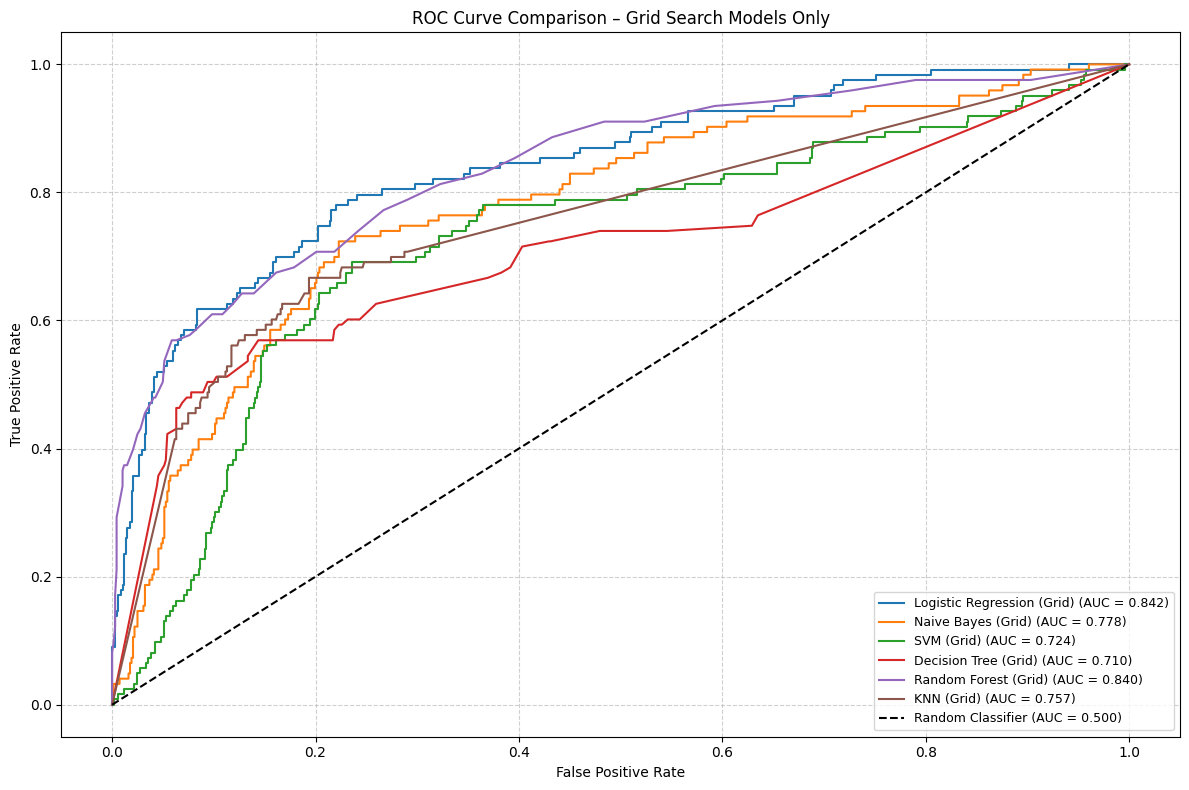

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.title('ROC Curve Comparison – Grid Search Models Only')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


grid_models = {
    "Logistic Regression (Grid)": best_model_lr,
    "Naive Bayes (Grid)": best_model_nb,
    "SVM (Grid)": best_model_svm,
    "Decision Tree (Grid)": best_model_dt,
    "Random Forest (Grid)": best_model_rf,
    "KNN (Grid)": best_model_knn
}

# Plotting ROC for each model
for name, model in grid_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)')


plt.legend(loc='lower right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Results

In [ ]:

# Logistic Regression (Grid): Highest AUC (0.842) and Recall (0.667), solid F1 (0.534). Great for interpretability and catching true deaths.


# Random Forest (Grid): Best overall — AUC (0.840), highest Precision (0.619), best F1 (0.593), strong PR-AUC (0.629).


# KNN (Grid): Moderate AUC (0.757), decent Recall (0.585), F1 (0.485). Simpler option, fair performance.


# Naive Bayes (Grid): AUC (0.778), Recall (0.561), F1 (0.469). Struggles with false positives.


# Decision Tree (Grid): AUC (0.710), F1 (0.471). Easy to interpret but low generalizability.


# SVM (Grid): Weakest model — very low Recall (0.065), F1 (0.104) despite AUC (0.724). Not suitable here.


# Summary: Random Forest = best balanced model. Logistic Regression = best for recall + interpretability.
#Random Forest is highly effective in balancing sensitivity and precision, minimizing false positives while still catching a substantial number of true death cases.
